# Inferential Statistics Practice
Using Python to apply inferential statistics concepts including sampling distribution, confidencde intervals, hypothesis testing, etc.

## Convidence Intervals
The confidence interval is the range of values that you expect your estimate to fall between a certain percentage of the time if you run your experiment again or re-sample the population in the same way.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
df = pd.read_csv('coffee_dataset.csv')

df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [ ]:
df.shape

(2974, 4)

In [ ]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200)

In [ ]:
coffee_red

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


In [ ]:
# explore dataset
coffee_red.head()
coffee_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2402 to 1422
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [ ]:
# proportion of coffee drinkers in sample
mean_drinker = coffee_red['drinks_coffee'].mean()
mean_non_drinker = 1-mean_drinker

In [ ]:
print(mean_drinker)
print(mean_non_drinker)

0.595
0.405


In [ ]:
drinks_height = coffee_red[coffee_red['drinks_coffee']]['height'].mean()
drinks_height

68.11962990858616

In [ ]:
non_drinks_height = coffee_red[~coffee_red['drinks_coffee']]['height'].mean()
non_drinks_height

66.78492279927877

In [ ]:
# bosstrap sample of 200 draws
bootsamp = coffee_red.sample(200, replace=True)
bootsamp['drinks_coffee'].mean()

0.605

(array([  16.,  106.,  590., 1831., 2989., 2644., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <a list of 10 Patch objects>)

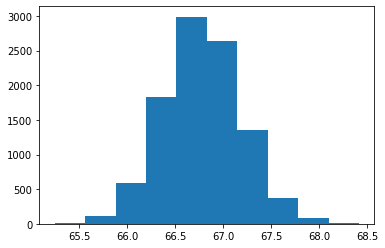

In [ ]:
# Bootstrap sample 10,000 times
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace=True)
    mean = bootsamp[bootsamp['drinks_coffee']==False]['height'].mean()
    boot_means.append(mean)
    
plt.hist(boot_means)

In [ ]:
# Obtain 95% confidence interval
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.9929132815752, 67.58402738281572)

In [ ]:
coffee_full[coffee_full['drinks_coffee']==False]['height'].mean()

66.443407762147